# Tableau Homework - Citi Bike Analytics

Since 2013, the Citi Bike Program has implemented a robust infrastructure for collecting data on the program's utilization. Through the team's efforts, each month bike data is collected, organized, and made public on the Citi Bike Data [webpage](https://www.citibikenyc.com/system-data)

### Import Dependencies

In [1]:
import os
import pandas as pd

In [2]:
directory = "JC-2018-2020"
filepath = os.path.join(directory,"JC-202011-citibike-tripdata.csv")
print(filepath)

JC-2018-2020\JC-202011-citibike-tripdata.csv


In [3]:
# df = pd.read_csv(filepath)

In [4]:
# Get list of files on the directory
files_list = [];
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        files_list.append(os.path.join(filename))

    else:
        continue

In [5]:
df_merged = pd.DataFrame({'A' : []})

In [6]:
n = 0
for file in files_list:
    if n == 0:
        filepath = os.path.join(directory,file)
        df_merged = pd.read_csv(filepath)
    else:
        filepath = os.path.join(directory,file)
        df = pd.read_csv(filepath)
        df_merged = pd.merge(df, df_merged, how='outer')
    
    n += 1

In [7]:
df_merged

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,756,2020-11-01 00:11:32.6250,2020-11-01 00:24:09.5850,3275,Columbus Drive,40.718355,-74.038914,3225,Baldwin at Montgomery,40.723659,-74.064194,42436,Subscriber,1984,1
1,584,2020-11-01 00:14:20.4820,2020-11-01 00:24:04.7820,3681,Grand St,40.715178,-74.037683,3209,Brunswick St,40.724176,-74.050656,46532,Customer,1969,0
2,403,2020-11-01 00:22:55.8820,2020-11-01 00:29:39.0950,3203,Hamilton Park,40.727596,-74.044247,3483,Montgomery St,40.719420,-74.050990,35139,Subscriber,1980,1
3,498,2020-11-01 00:41:37.4270,2020-11-01 00:49:55.7010,3268,Lafayette Park,40.713464,-74.062859,3213,Van Vorst Park,40.718489,-74.047727,46539,Customer,1969,0
4,151,2020-11-01 00:53:21.2340,2020-11-01 00:55:52.8060,3185,City Hall,40.717733,-74.043845,3276,Marin Light Rail,40.714584,-74.042817,44388,Subscriber,1986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070491,247,2018-01-31 11:03:59.1750,2018-01-31 11:08:07.0570,3640,Journal Square,40.733670,-74.062500,3201,Dey St,40.737711,-74.066921,31828,Subscriber,1962,1
1070492,806,2018-01-31 15:34:36.8370,2018-01-31 15:48:03.0280,3640,Journal Square,40.733670,-74.062500,3211,Newark Ave,40.721525,-74.046305,31842,Subscriber,1987,1
1070493,1499,2018-01-31 15:45:09.8000,2018-01-31 16:10:09.4400,3640,Journal Square,40.733670,-74.062500,3640,Journal Square,40.733670,-74.062500,29622,Subscriber,1981,1
1070494,291,2018-01-31 16:54:11.9480,2018-01-31 16:59:03.5760,3640,Journal Square,40.733670,-74.062500,3201,Dey St,40.737711,-74.066921,29622,Subscriber,1963,1


### Analytics

* How many trips have been recorded total during the chosen period?

In [8]:
# How many trips have been recorded total during the chosen period?
total_trips = df_merged['tripduration'].count()
print(f"How many trips have been recorded total during the chosen period? \nR:{total_trips}")

How many trips have been recorded total during the chosen period? 
R:1070496


<hr style="border-top: 3px solid gray;">

* By what percentage has total ridership grown?

In [9]:
df_merged.index = pd.to_datetime(df_merged['starttime'],format='%Y-%m-%d')
df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year])
# df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year, df_merged.index.month])

In [10]:
df_grouped_year = df_grouped_starttime.count()
df_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2018,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892
2019,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947
2020,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657


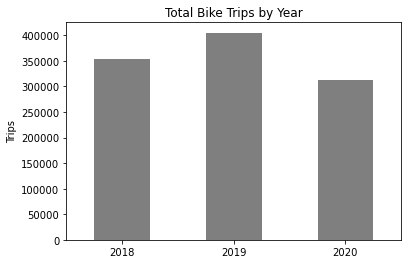

In [116]:
ax = df_grouped_year['tripduration'].plot(kind="bar",color="black", alpha=0.5,rot=0)
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Total Bike Trips by Year");

In [13]:
growth_2019 = df_grouped_year['tripduration'].iloc[1] / df_grouped_year['tripduration'].iloc[0]
growth_2020 = df_grouped_year['tripduration'].iloc[2] / df_grouped_year['tripduration'].iloc[1]

In [14]:
print(f"Growth 2019: {round(growth_2019*100)}%")
print(f"Growth 2020*: {round(growth_2020*100)}%")
print("\n* for 2020 still missing December")

Growth 2019: 114.0%
Growth 2020*: 77.0%

* for 2020 still missing December


<hr style="border-top: 3px solid gray;">

* How has the proportion of short-term customers and annual subscribers changed?

In [15]:
df_Subscriber = df_merged.loc[df_merged['usertype'] == 'Subscriber']
df_Subscriber_grouped_year = df_Subscriber.groupby(by=[ df_Subscriber.index.year]).count()
df_Subscriber_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2018,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725
2019,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921
2020,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965


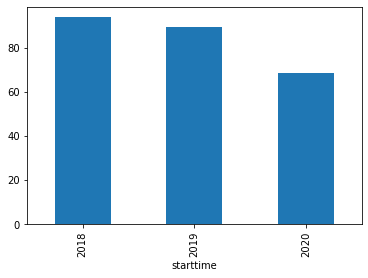

In [16]:
subscriber_to_total = 100*df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration']
subscriber_to_total.plot(kind='bar')

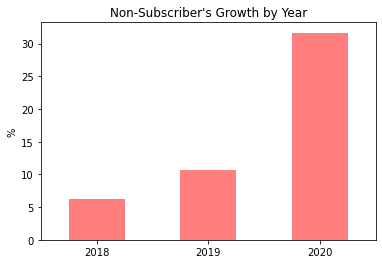

In [31]:
customer_to_total = 100*(1-df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration'])
ax = customer_to_total.plot(kind='bar',color="r", alpha=0.5,rot=0)
ax.set_xlabel("");
ax.set_ylabel("%");
ax.set_title("Non-Subscriber's Growth by Year");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during summer months?

In [37]:
# summer (June, July, August)
df_resampled_year = df_merged['starttime'].resample('Y')
df_resampled_year


In [38]:
df_resampled_year.count()

starttime
2018-12-31    353892
2019-12-31    404947
2020-12-31    311657
Freq: A-DEC, Name: starttime, dtype: int64

In [45]:
df_resampled_by_hour = df_merged['starttime'].resample('H').count()

In [53]:
df_resampled_by_hour

starttime
2018-01-01 00:00:00     1
2018-01-01 01:00:00     3
2018-01-01 02:00:00     3
2018-01-01 03:00:00     7
2018-01-01 04:00:00     1
                       ..
2020-11-30 19:00:00    25
2020-11-30 20:00:00    12
2020-11-30 21:00:00    14
2020-11-30 22:00:00     8
2020-11-30 23:00:00     5
Freq: H, Name: starttime, Length: 25560, dtype: int64

In [78]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-06-01")]

In [80]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour_summer_2018.loc[(df_resampled_by_hour_summer_2018.index < "2018-09-01")]

In [84]:
df_summer_2018 = pd.DataFrame(df_resampled_by_hour_summer_2018.resample('H').sum())

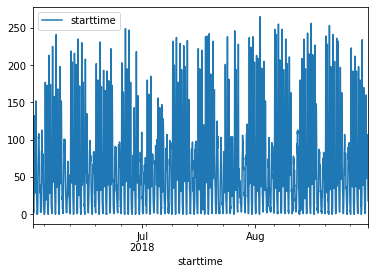

In [86]:
df_summer_2018.plot()

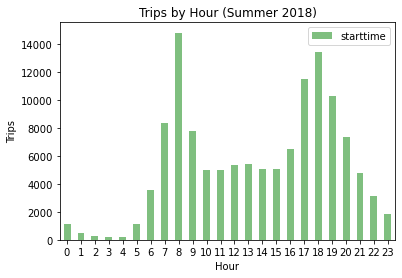

In [102]:
ax = df_summer_2018.groupby(by=[ df_summer_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0)
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2018)");

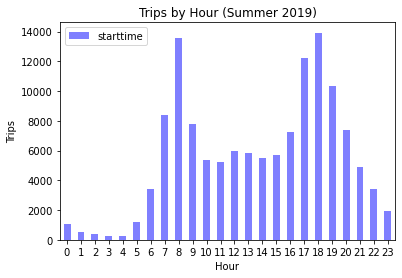

In [103]:
df_resampled_by_hour_summer_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-06-01")]
df_resampled_by_hour_summer_2019 = df_resampled_by_hour_summer_2019.loc[(df_resampled_by_hour_summer_2019.index < "2019-09-01")]
df_summer_2019 = pd.DataFrame(df_resampled_by_hour_summer_2019.resample('H').sum())
ax = df_summer_2019.groupby(by=[ df_summer_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0)
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2019)");

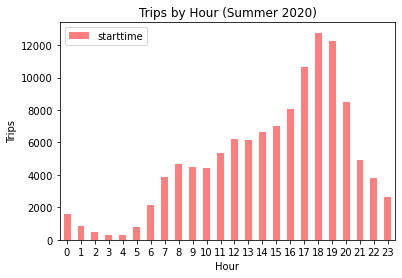

In [104]:
df_resampled_by_hour_summer_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-06-01")]
df_resampled_by_hour_summer_2020 = df_resampled_by_hour_summer_2020.loc[(df_resampled_by_hour_summer_2020.index < "2020-09-01")]
df_summer_2020 = pd.DataFrame(df_resampled_by_hour_summer_2020.resample('H').sum())
ax = df_summer_2020.groupby(by=[ df_summer_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0)
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2020)");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during winter months?

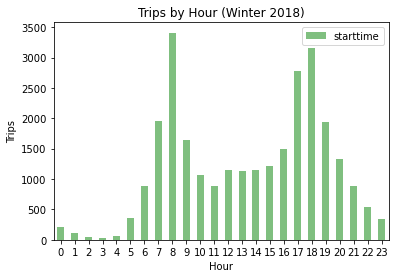

In [110]:
df_resampled_by_hour_winter_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-01-01")]
df_resampled_by_hour_winter_2018 = df_resampled_by_hour_winter_2018.loc[(df_resampled_by_hour_winter_2018.index < "2018-03-01")]
df_winter_2018 = pd.DataFrame(df_resampled_by_hour_winter_2018.resample('H').sum())
ax = df_winter_2018.groupby(by=[ df_winter_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0)
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2018)");

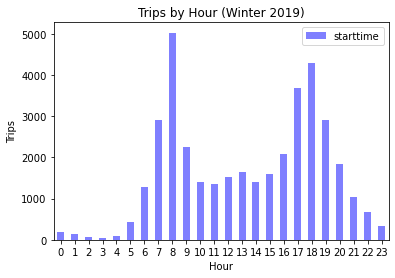

In [113]:
df_resampled_by_hour_winter_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-01-01")]
df_resampled_by_hour_winter_2019 = df_resampled_by_hour_winter_2019.loc[(df_resampled_by_hour_winter_2019.index < "2019-03-01")]
df_winter_2019 = pd.DataFrame(df_resampled_by_hour_winter_2019.resample('H').sum())
ax = df_winter_2019.groupby(by=[ df_winter_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0)
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2019)");

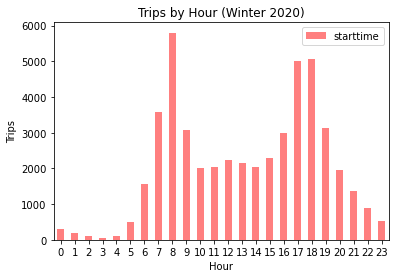

In [108]:
df_resampled_by_hour_winter_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-01-01")]
df_resampled_by_hour_winter_2020 = df_resampled_by_hour_winter_2020.loc[(df_resampled_by_hour_winter_2020.index < "2020-03-01")]
df_winter_2020 = pd.DataFrame(df_resampled_by_hour_winter_2020.resample('H').sum())
ax = df_winter_2020.groupby(by=[ df_winter_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0)
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2020)");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for starting a journey? (Based on data, why do you hypothesize these are the top locations?)

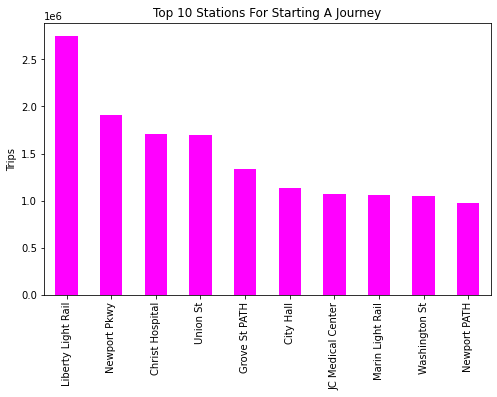

In [146]:
top10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").sum().sort_values("tripduration",ascending=False).head(10)
ax = top10_start_stations['tripduration'].plot(kind="bar", color="fuchsia", alpha=1,figsize=(8, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for ending a journey? (Based on data, why?)

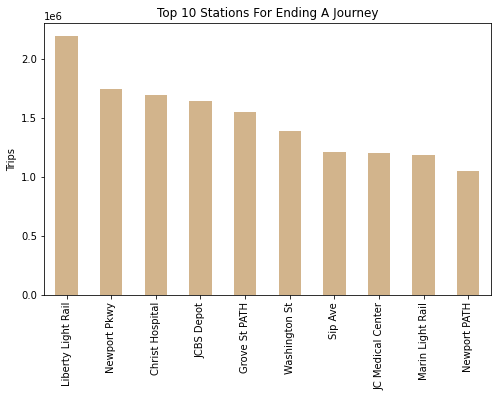

In [149]:
top10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").sum().sort_values("tripduration",ascending=False).head(10)
ax = top10_ending_stations['tripduration'].plot(kind="bar", color="tan", alpha=1,figsize=(8, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for starting a journey? (Based on data, why?)

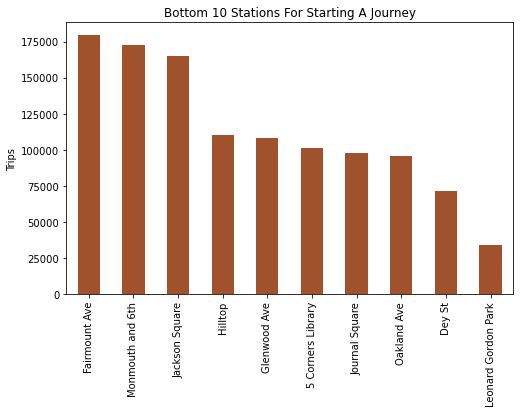

In [155]:
bottom10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").sum().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_start_stations['tripduration'].plot(kind="bar", color="sienna", alpha=1,figsize=(8, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for ending a journey (Based on data, why?)

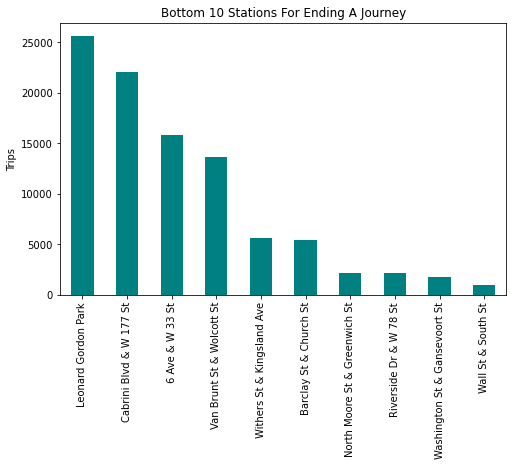

In [158]:
bottom10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").sum().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_ending_stations['tripduration'].plot(kind="bar", color="teal", alpha=1,figsize=(8, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what is the gender breakdown of active participants (Male v. Female)?

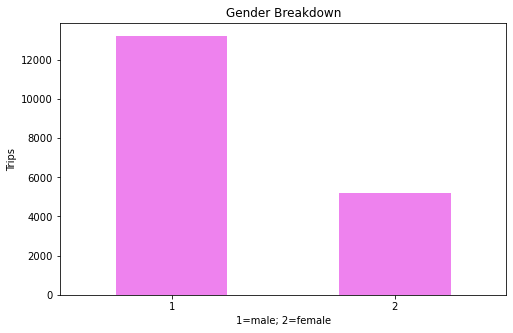

In [188]:
gender_breakdown = df_merged.loc[(df_merged.index >= "2020-11-01") & (df_merged.gender != 0)].groupby("gender")
ax = gender_breakdown['tripduration'].count().plot(kind="bar", rot=0,color="violet", alpha=1,figsize=(8, 5))
ax.set_xlabel("1=male; 2=female");
ax.set_ylabel("Trips");
ax.set_title("Gender Breakdown");

<hr style="border-top: 3px solid gray;">

* How effective has gender outreach been in increasing female ridership over the timespan?

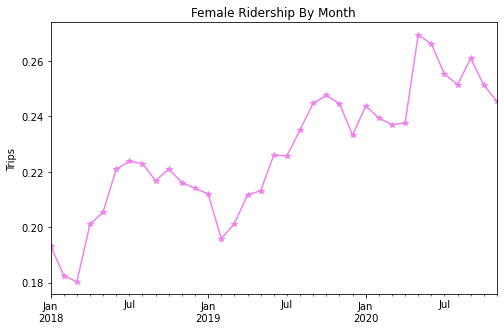

In [212]:
female_ridership_by_month = df_merged['tripduration'].loc[(df_merged.gender == 2)].resample("M").count() / df_merged['tripduration'].resample("M").count()
ax = female_ridership_by_month.plot(color="violet",marker='*', alpha=1,figsize=(8, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Female Ridership By Month");

<hr style="border-top: 3px solid gray;">

* How does the average trip duration change by age?

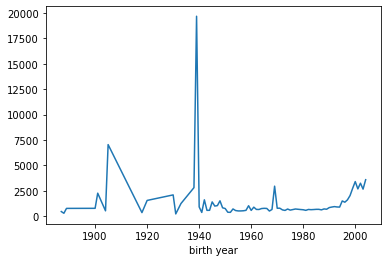

In [225]:
df_average_trip_duration_by_age = df_merged.groupby("birth year").mean()
df_average_trip_duration_by_age['tripduration'].plot()

<hr style="border-top: 3px solid gray;">

* What is the average distance in miles that a bike is ridden?

<hr style="border-top: 3px solid gray;">

* Which bikes (by ID) are most likely due for repair or inspection in the timespan?

<hr style="border-top: 3px solid gray;">

* How variable is the utilization by bike ID?

<hr style="border-top: 3px solid gray;">